In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
url= "https://raw.githubusercontent.com/ZakyAlFatih/gdgoc_ML/refs/heads/main/wine-clustering.csv"
df= pd.read_csv(url)

In [84]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [85]:
df.isna().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [86]:
df.duplicated().sum()

0

In [87]:
categorical_cols = [x for x in df.columns if df[x].dtype == "object"]

In [88]:
categorical_cols

[]

In [89]:
numeric_cols= [x for x in df.columns if df[x].dtype != "object"]
numeric_cols

['Alcohol',
 'Malic_Acid',
 'Ash',
 'Ash_Alcanity',
 'Magnesium',
 'Total_Phenols',
 'Flavanoids',
 'Nonflavanoid_Phenols',
 'Proanthocyanins',
 'Color_Intensity',
 'Hue',
 'OD280',
 'Proline']

In [90]:
df.columns.size

13

In [91]:
len(df)

178

In [92]:
!pip install feature-engine

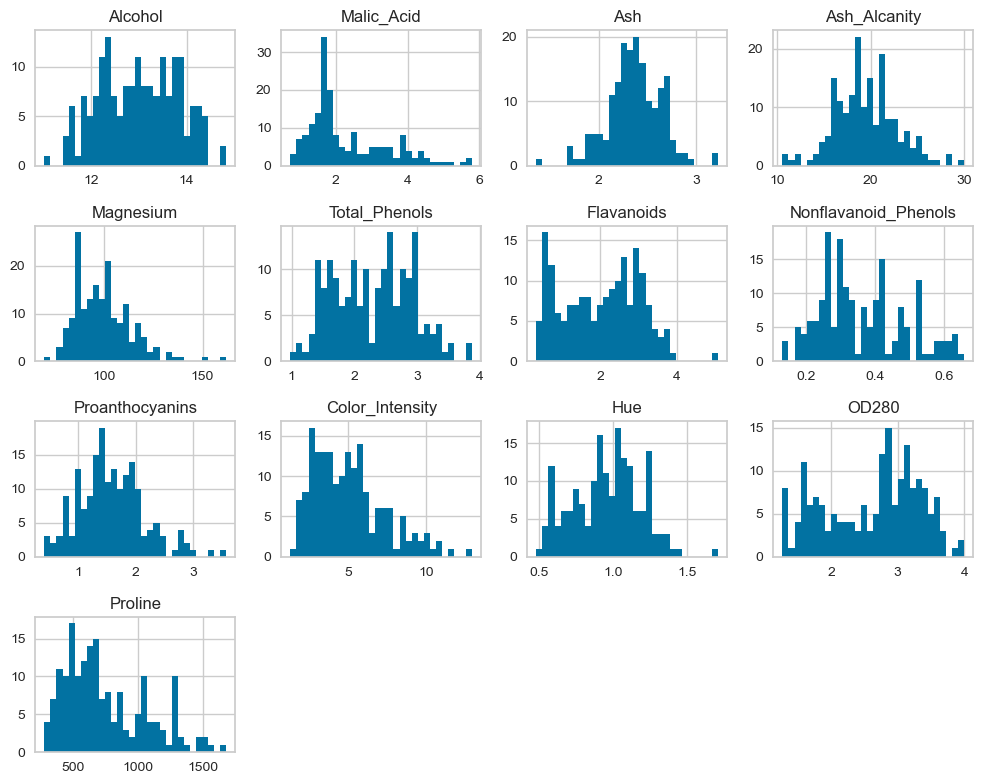

In [93]:
df[numeric_cols].hist(figsize=(10,8),bins=30)
plt.tight_layout()
plt.show()

<Axes: ylabel='Magnesium'>

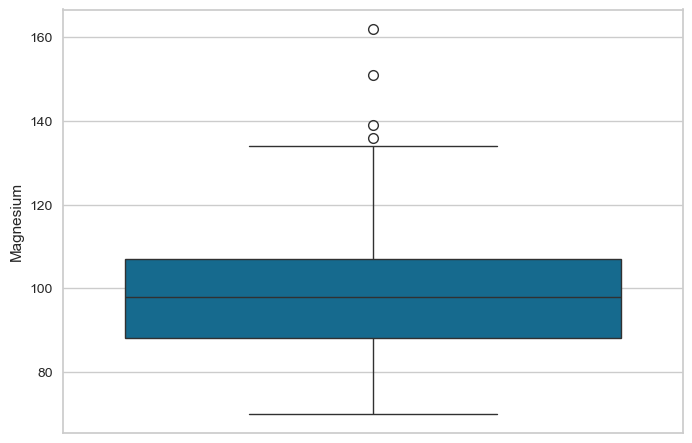

In [94]:
sns.boxplot(df['Magnesium'])

<Axes: ylabel='Magnesium'>

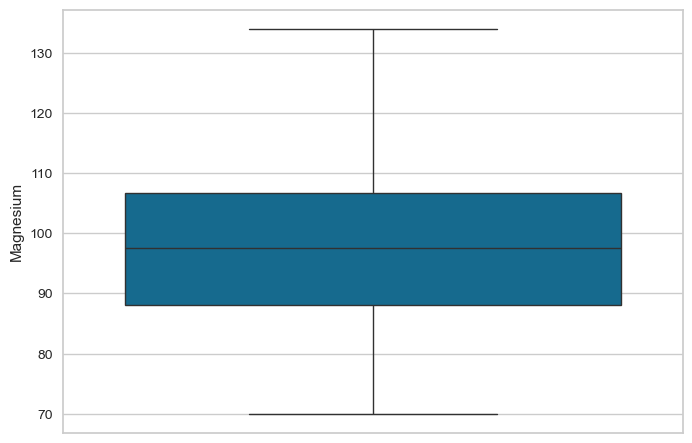

In [95]:
from feature_engine.outliers import OutlierTrimmer

remove_outlier = OutlierTrimmer(
    capping_method='iqr',
    tail='right',
    variables=['Magnesium']
)

df = remove_outlier.fit_transform(df)

sns.boxplot(df['Magnesium'])

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2', 'PC3'])

df_pca.head()

,PC1,PC2,PC3
0,320.870525,22.831375,-3.493391
1,305.434347,-4.071082,-6.707363
2,440.398189,-5.026894,1.166462
3,735.569976,2.057608,0.932544
4,-9.261029,19.494654,0.132118


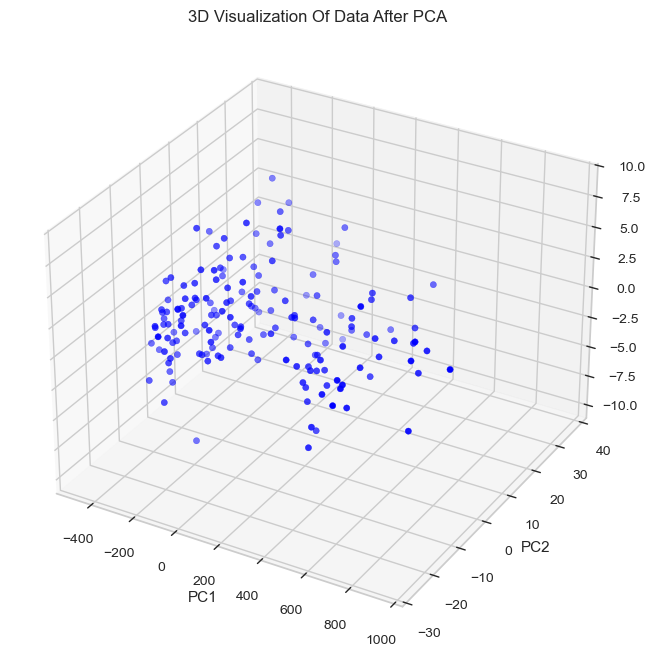

In [97]:
x, y, z = df_pca['PC1'], df_pca['PC2'], df_pca['PC3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Visualization Of Data After PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

# Clustering

In [99]:
!pip install yellowbrick

E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

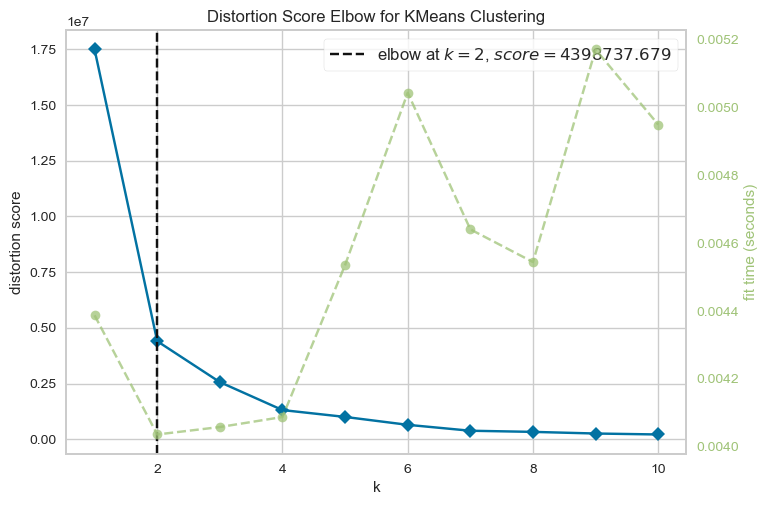

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(df_pca)
visualizer.show()

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

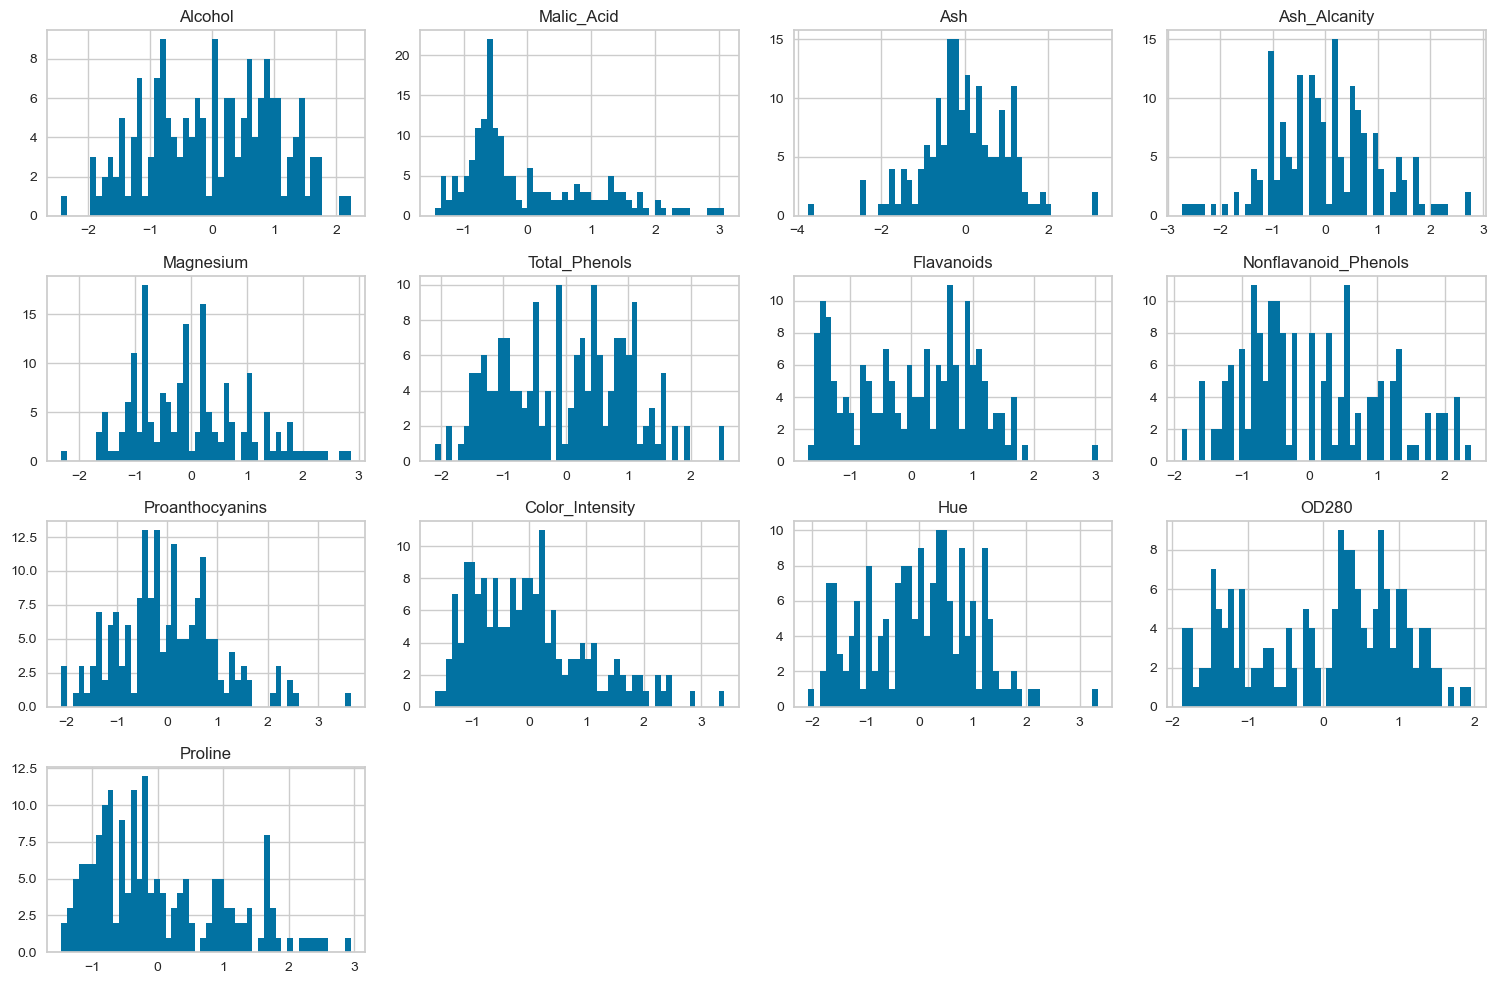

In [102]:
df[numeric_cols].hist(figsize=(15,10), bins=50)
plt.tight_layout()
plt.show()

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
df_pca = pd.DataFrame(pca.transform(df), columns=['PC1', 'PC2', 'PC3'])

df_pca.head()

,PC1,PC2,PC3
0,3.435790,1.573813,-0.067702
1,2.291431,-0.412338,-2.025046
2,2.608566,0.941152,1.062658
3,3.895085,2.658974,-0.177954
4,1.077423,1.027605,2.104991


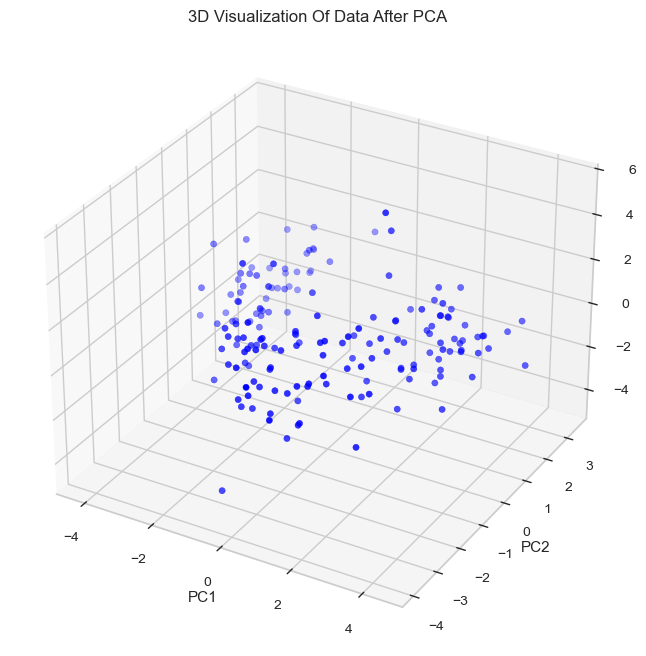

In [104]:
x, y, z = df_pca['PC1'], df_pca['PC2'], df_pca['PC3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("3D Visualization Of Data After PCA")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.show()

E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

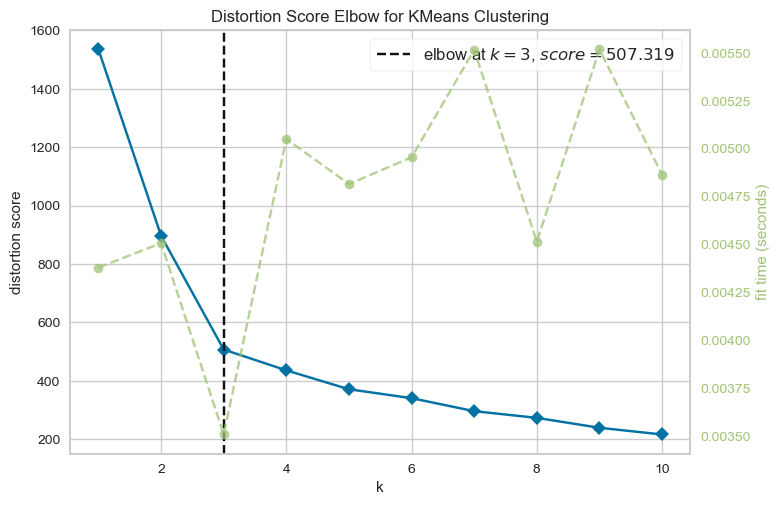

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,11))
visualizer.fit(df_pca)
visualizer.show()

In [106]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


In [107]:
kmeans = KMeans(n_clusters=3) # definisi model KMeans

y_kmeans = kmeans.fit_predict(df_pca) # clustering di data PCA

E:\DownloadApp\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [108]:
y_kmeans # hasil cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [109]:
df['Cluster Kmeans'] = y_kmeans

In [110]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster Kmeans
0,1.496271,-0.581902,0.214593,-1.195045,2.295024,0.811496,1.028174,-0.681089,1.313463,0.231199,0.388564,1.846961,1.011574,1
1,0.230820,-0.519158,-0.859648,-2.550292,0.108888,0.571414,0.729206,-0.842656,-0.521709,-0.312548,0.432627,1.116285,0.964219,1
2,0.181676,0.000721,1.103620,-0.271014,0.189856,0.811496,1.207555,-0.519522,2.258304,0.248461,0.344501,0.793101,1.390417,1
3,1.668274,-0.366780,0.473892,-0.825433,1.161472,2.492071,1.456694,-1.004223,1.113593,1.163337,-0.404568,1.186542,2.321741,1
4,0.279964,0.206880,1.844476,0.468211,1.566312,0.811496,0.659447,0.207530,0.459472,-0.338441,0.388564,0.455865,-0.030246,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.857402,2.949693,0.288678,0.314206,-0.295952,-0.981117,-1.413396,1.257716,-0.921450,1.120182,-1.373952,-1.216260,-0.014461,2
174,0.476539,1.390055,0.399807,1.084232,0.270824,-0.789052,-1.273877,0.530664,-0.285499,0.947564,-1.109575,-1.469187,0.017110,2
175,0.316822,1.721702,-0.415135,0.160201,1.728248,-1.125167,-1.333671,0.530664,-0.394519,2.199045,-1.594267,-1.469187,0.285457,2
176,0.193962,0.206880,-0.007664,0.160201,1.728248,-1.029134,-1.343636,1.338499,-0.194649,1.810655,-1.550204,-1.384878,0.301242,2


In [118]:
print(df.dtypes)


Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium               float64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                 float64
Cluster Kmeans            int32
dtype: object


In [120]:
print(df.columns)


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Cluster Kmeans'],
      dtype='object')


In [116]:
print(df.shape)  # Menampilkan jumlah baris dan kolom
print(df.head())  # Menampilkan 5 baris pertama


(174, 14)
    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.496271   -0.581902  0.214593     -1.195045   2.295024       0.811496   
1  0.230820   -0.519158 -0.859648     -2.550292   0.108888       0.571414   
2  0.181676    0.000721  1.103620     -0.271014   0.189856       0.811496   
3  1.668274   -0.366780  0.473892     -0.825433   1.161472       2.492071   
4  0.279964    0.206880  1.844476      0.468211   1.566312       0.811496   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.028174             -0.681089         1.313463         0.231199   
1    0.729206             -0.842656        -0.521709        -0.312548   
2    1.207555             -0.519522         2.258304         0.248461   
3    1.456694             -1.004223         1.113593         1.163337   
4    0.659447              0.207530         0.459472        -0.338441   

        Hue     OD280   Proline  Cluster Kmeans  
0  0.388564  1.846961  1.011574       

In [111]:
palette_kmeans = ['#679436', '#eb5e28', '#4361ee']

<Axes: xlabel='Cluster Kmeans', ylabel='Count'>

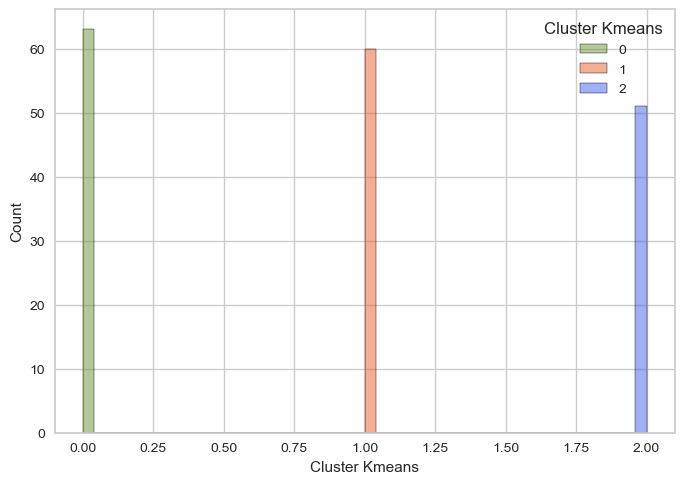

In [112]:
sns.histplot(data=df, x='Cluster Kmeans', hue='Cluster Kmeans', palette=palette_kmeans, bins=50)

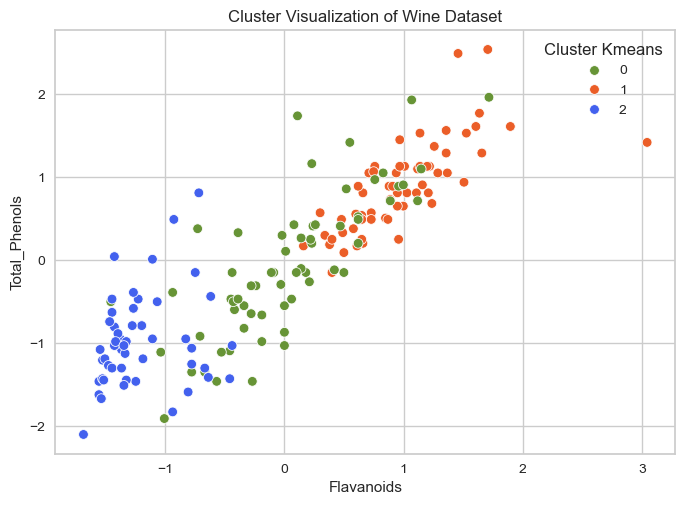

In [126]:
sns.scatterplot(x='Flavanoids', y='Total_Phenols', data=df, hue='Cluster Kmeans', palette=palette_kmeans)
plt.title("Cluster Visualization of Wine Dataset")
plt.show()

 ## Analisis per Kluster
 
### Kluster 0 (Hijau)

Distribusi: Sebagian besar titik terletak di area tengah grafik, dengan nilai Flavanoids berkisar antara 0 hingga 2 dan Total Phenols antara 0 hingga 1.
Variabilitas: Distribusi cukup padat dan konsisten, menunjukkan homogenitas dalam karakteristik kimia wine di kluster ini.
Outlier: Tidak ada outlier signifikan; kluster ini relatif kompak.
Kesimpulan: Kelompok wine dengan kadar Flavanoids dan Total Phenols sedang, mungkin mewakili jenis wine dengan profil kimia standar atau menengah.
### Kluster 1 (Merah)

Distribusi: Titik-titik tersebar di area kanan atas grafik, dengan Flavanoids berkisar antara 1 hingga 3 dan Total Phenols antara 1 hingga 2.
Variabilitas: Distribusi lebih terpencar dibandingkan kluster hijau, tetapi tetap terfokus, menunjukkan variasi moderat.
Outlier: Ada beberapa titik di luar distribusi utama (misalnya, di Flavanoids ~3 dan Total Phenols ~2), menunjukkan wine dengan karakteristik kimia yang lebih ekstrem.
Kesimpulan: Kelompok wine dengan kadar Flavanoids dan Total Phenols tinggi, mungkin mewakili wine berkualitas tinggi atau spesifik (misalnya, wine merah premium).

### Kluster 2 (Biru)
Distribusi: Titik-titik terletak di area kiri bawah grafik, dengan Flavanoids berkisar antara -1 hingga 0 dan Total Phenols antara -1 hingga 0.
Variabilitas: Distribusi padat dan konsisten, dengan sedikit variasi.
Outlier: Tidak ada outlier signifikan; kluster ini sangat homogen.
Kesimpulan: Kelompok wine dengan kadar Flavanoids dan Total Phenols rendah, mungkin mewakili wine dengan profil kimia sederhana atau berkualitas lebih rendah.

## Insight Umum

 Segmentasi: Grafik menunjukkan pemisahan yang jelas antara tiga kluster berdasarkan kadar Flavanoids dan Total Phenols. Kluster biru (rendah), hijau (menengah), dan merah (tinggi) mencerminkan variasi kimia wine dalam dataset.
 Ketidakseimbangan: Adanya outlier di kluster merah (misalnya, titik dengan Flavanoids ~3 dan Total Phenols ~2) menunjukkan adanya wine dengan karakteristik kimia yang sangat berbeda, yang dapat menjadi fokus analisis lebih lanjut (misalnya, faktor varietas anggur, proses fermentasi, atau wilayah asal).

 Distribusi yang Tidak Merata: Kluster biru dan hijau memiliki distribusi yang lebih padat, sedangkan kluster merah menunjukkan variabilitas lebih besar, yang mungkin mencerminkan diversitas dalam wine berkualitas tinggi.

### Aplikasi:
Industri Wine: Memahami profil kimia wine untuk klasifikasi, kualitas, atau segmentasi pasar (misalnya, wine ekonomis vs. premium).
Penelitian: Mengidentifikasi pola kimia yang berkorelasi dengan varietas, wilayah, atau kualitas wine.
Pemasaran: Menargetkan konsumen berdasarkan preferensi untuk jenis wine tertentu (misalnya, wine dengan kadar fenol tinggi untuk penggemar wine merah).